In [13]:
import numpy as np
import matplotlib.pyplot as plt


class Brownian():
    # A Brownian motion class constructor
    def __init__(self, M):
        #Draw the board for molecule to move
        assert (type(M)== int)
        
        self.M = M
        self.board = np.zeros((M,M))
        
        #Represent walls as 1s otherwise 0s
        for i in range (0, M-1):
            for j in range (0, M-1):
                if(i == 0 or i == M or j == 0 or j == M): self.board[i][j] = 1
                    
        #randomly generate 3 holes on the board
        hole = np.zeros(3)
        for i in range(0,2):
            hole[i] = np.random.random_integers(0, n_step)
               
    # Generate a random walk by n steps, return two array that has the position of particles
    def gen_random_walk(self,n_step=1000):

        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It can not generate a good simulation sequence!")
        
        if n_step > self.M: 
            print("WARNING! The number of steps is big. It can not generate a good simulation sequence!")
        # w is the matrix that store all the xs,ys position of the particle
        x = np.zeros(n_step)
        y = np.zeros(n_step)
        w = [x,y]
        
        #randomly start position
        initial_position_x = np.random.random_integers(0, n_step)
        initial_position_y = np.random.random_integers(0, n_step)
        x[0] = initial_position_x
        y[0]= initial_position_y
        count = 0
        
        #curr pointer
        curr_x = initial_position_x
        curr_y = initial_position_y
        
        #randomly walk
        while (count < n_step - 1):
            choice = np.random.randint(4)
            #go up
            if choice == 0 : curr_y += 1
            #go down
            elif choice == 1 : curr_y -= 1
            #go right
            elif choice == 2 : curr_x += 1
            #go left
            else: curr_x -= 1
            
            #record the position
            x[count + 1] = curr_x
            y[count + 1] = curr_y
            count +=1
            
        return w    
    
    def draw_plot(walk, holes):
        plt.plot(w[0],w[1], color = 'red')
        plt.plot(w[0],w[1], color = 'red')

        

/var/folders/p3/4gx8p5sd12n7zs1l1qj00v_00000gn/T/ipykernel_42081/1908305246.py:34: DeprecationWarning: This function is deprecated. Please call randint(0, 1000 + 1) instead
  initial_position_x = np.random.random_integers(0, n_step)
/var/folders/p3/4gx8p5sd12n7zs1l1qj00v_00000gn/T/ipykernel_42081/1908305246.py:35: DeprecationWarning: This function is deprecated. Please call randint(0, 1000 + 1) instead
  initial_position_y = np.random.random_integers(0, n_step)


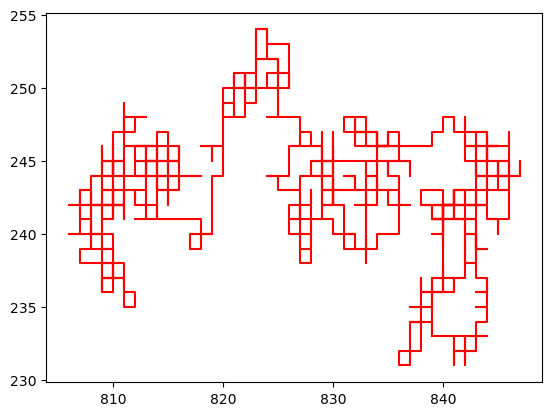

In [12]:
b = Brownian(1000)
w = b.gen_random_walk(1000)

#plt.scatter(w[0],w[1])
plt.plot(w[0],w[1], color = 'red')
plt.show()



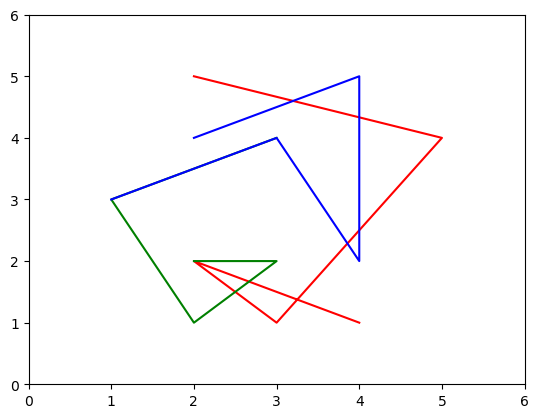

In [9]:

def plot_random_squares():
    # Generate random coordinates for the squares
    x1 = np.random.randint(1, 6, size=5)
    y1 = np.random.randint(1, 6, size=5)
    x2 = np.random.randint(1, 6, size=5)
    y2 = np.random.randint(1, 6, size=5)
    x3 = np.random.randint(1, 6, size=5)
    y3 = np.random.randint(1, 6, size=5)
    
    # Set random colors for the squares
    colors = ['red', 'green', 'blue']
    
    # Plot the squares
    plt.plot(x1, y1, color=colors[0])
    plt.plot(x2, y2, color=colors[1])
    plt.plot(x3, y3, color=colors[2])
    
    # Set the axis limits
    plt.xlim(0, 6)
    plt.ylim(0, 6)
    
    # Show the plot
    plt.show()

plot_random_squares()


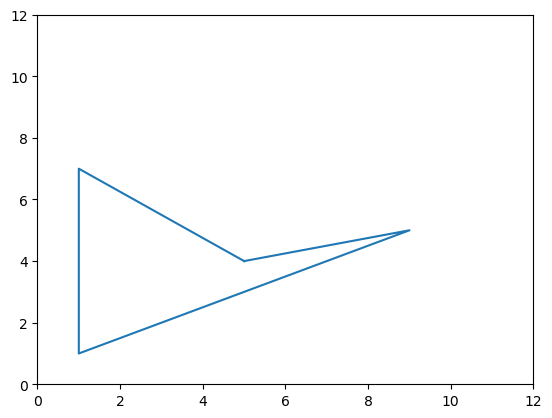

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random coordinates for the square vertices
x = np.random.randint(1, 11, size=4)
y = np.random.randint(1, 11, size=4)

# Add the first coordinate to the end to close the square
x = np.append(x, x[0])
y = np.append(y, y[0])

# Plot the square vertices
plt.plot(x, y)

# Set the axis limits
plt.xlim(0, 12)
plt.ylim(0, 12)

# Show the plot
plt.show()



Python 3.10.9 (main, Mar  1 2023, 12:20:14) [Clang 14.0.6 ] on darwin

STATS:
    Squares: 30
    Allow  overlapping: False
    Generated values: 953


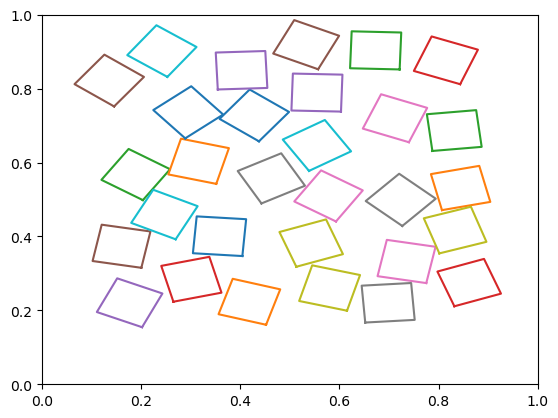

In [21]:
import sys
from random import random, seed
from math import pi, sin, cos, sqrt
import matplotlib.pyplot as plt

pi_2 = pi / 2

MINX = MINY = 0
MAXX = MAXY = 1
DEFAULT_SIDE = 0.1
DEFAULT_SAFETY_MARGIN = DEFAULT_SIDE * sqrt(2)
MAX_SQUARES = 30

__global_generation_counter = 0


def get_func_deg1(p0, p1):
    (x0, y0), (x1, y1) = p0, p1
    if x0 == x1:
        return None
    a = (y0 - y1)/(x0 - x1)
    b = y0 - x0 * a
    return lambda x: a * x + b


def is_point_in_square(p, sq):
    x, y = p
    p0, p1, p2, p3 = sq
    side_func0 = get_func_deg1(p0, p1)
    side_func1 = get_func_deg1(p1, p2)
    side_func2 = get_func_deg1(p2, p3)
    side_func3 = get_func_deg1(p3, p0)
    if not side_func0 or not side_func1 or not side_func2 or not side_func3:
        xmin = min(p0[0], p2[0])
        xmax = max(p0[0], p2[0])
        ymin = min(p0[1], p2[1])
        ymax = max(p0[1], p2[1])
        return xmin <= x <= xmax and ymin <= y <= ymax
    return ((y - side_func0(x)) * (y - side_func2(x))) <= 0 and \
           ((y - side_func1(x)) * (y - side_func3(x))) <= 0


def squares_overlap(square0, square1):
    for p0 in square0:
        if is_point_in_square(p0, square1):
            return True
    for p1 in square1:
        if is_point_in_square(p1, square0):
            return True
    xc0 = (square0[0][0] + square0[2][0]) / 2
    yc0 = (square0[0][1] + square0[2][1]) / 2
    if is_point_in_square((xc0, yc0), square1):
        return True
    return False


def __generation_monitor():
    global __global_generation_counter
    __global_generation_counter += 1


def generate_random_point(minx=MINX, miny=MINY, maxx=MAXX, maxy=MAXY, safety_margin=DEFAULT_SAFETY_MARGIN):
    if maxx - minx < 2 * safety_margin or maxy - miny < 2 * safety_margin:
        print("MUEEE")
        safety_margin = 0
    x = safety_margin + random() * (maxx - minx - 2 * safety_margin)
    y = safety_margin + random() * (maxy - miny - 2 * safety_margin)
    __generation_monitor()
    return x, y


def generate_random_angle(max_val=pi_2):
    return random() * max_val


def generate_random_square(side=DEFAULT_SIDE, squares_to_avoid=()):
    while 1:
        restart = False
        x0, y0 = generate_random_point()

        angle = generate_random_angle()
        x1 = x0 + side * cos(angle)
        y1 = y0 + side * sin(angle)

        angle += pi_2
        x2 = x1 + side * cos(angle)
        y2 = y1 + side * sin(angle)

        angle += pi_2
        x3 = x2 + side * cos(angle)
        y3 = y2 + side * sin(angle)

        ret = (x0, y0), (x1, y1), (x2, y2), (x3, y3)
        for square in squares_to_avoid:
            if squares_overlap(ret, square):
                restart = True
        if restart:
            continue
        return ret


def square_to_plot(square):
    xs, ys = zip(square[0], square[1], square[2], square[3])
    return xs + (xs[0],), ys + (ys[0],)


def main():
    seed()
    squares = list()
    allow_overlapping = False # CHANGE to True to allow square to overlap
    for _ in range(MAX_SQUARES):
        #print("Generating:", _)
        if allow_overlapping:
            square = generate_random_square()
        else:
            square = generate_random_square(squares_to_avoid=squares)
        squares.append(square)
    plot_squares = tuple()
    for sq in squares:
        plot_squares += square_to_plot(sq)
    print("STATS:\n    Squares: {}\n    Allow  overlapping: {}\n    Generated values: {}".format(MAX_SQUARES, allow_overlapping, __global_generation_counter))
    plt.plot(*plot_squares)
    plt.axis([MINX, MAXX, MINY, MAXY])
    plt.show()


if __name__ == "__main__":
    print("Python {:s} on {:s}\n".format(sys.version, sys.platform))
    main()